## Data Info  
- 600 word combination * 40 participants (- some missing words) = 20655 observations
- 256 time frames * 30 channels
- 30 words across 4 languages
- Word pairs : Prime and Target.
- 256 obs per electrode from -100ms to 900ms
- Target word shown at 0ms
- Response of Interest : N400



In [ ]:
path = "/content/drive/MyDrive/FA24 CLASS/Sandia Challenge/"

In [ ]:
import zipfile
import pandas as pd

zip_path = path + "Individual_ERPs.zip"
file_list = []
with zipfile.ZipFile(zip_path, 'r') as zip_file:
    print("Files in the zip archive:")
    for file_name in zip_file.namelist():
        #print(file_name)
        file_name2 = file_name.split("/")[-1]
        file_list.append(file_name2)

    #sample_file_name = zip_file.namelist()[0]
    with zip_file.open(file_name) as file:
        df = pd.read_csv(file)
        print(f"\nData from {file_name}:")
        #print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FA24 CLASS/Sandia Challenge/Individual_ERPs.zip'

In [ ]:
file_list = pd.DataFrame(file_list)
file_list.head(10)

,0
0,
1,garlic_french-french_unrelated_18.csv
2,neck_spanish-english_translation_26.csv
3,pillow_french-english_unrelated_6.csv
4,mouth_english-french_translation_6.csv
5,book_german-english_translation_2.csv
6,knife_german-german_unrelated_24.csv
7,yesterday_french-french_translation_2.csv
8,pocket_english-english_translation_12.csv
9,neck_english-english_unrelated_14.csv


No charts were generated by quickchart


Filter relevant EEG channels
- Cz, Pz are related to language
- O1, O2 are not related to language
- Check if these channels clearly differ

In [ ]:
df_lang = df.transpose().loc[['Cz', 'Pz','O1','O2']]
df_lang

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Cz,-7.491027,-3.102027,2.051973,7.793973,13.533973,18.443973,21.757973,23.089973,22.638973,21.130973,...,-4.787027,-3.276027,-0.408027,3.082973,6.274973,8.383973,9.022973,8.311973,6.824973,6.824973
Pz,-11.862816,-9.157816,-4.941816,0.713184,7.130184,13.274184,18.128184,21.067184,22.072184,21.687184,...,-9.088816,-7.710816,-5.440816,-2.769816,-0.174816,2.052184,3.849184,5.329184,6.679184,6.679184
O1,-17.792363,-15.051363,-11.885363,-8.460363,-5.237363,-2.834363,-1.780363,-2.279363,-4.084363,-6.570363,...,-12.883363,-10.933363,-8.303363,-5.827363,-4.160363,-3.657363,-4.354363,-5.996363,-8.108363,-8.108363
O2,-52.862781,-43.332781,-33.739781,-24.286781,-15.404781,-7.711781,-1.880781,1.524219,2.221219,0.343219,...,-20.215781,-17.904781,-14.205781,-10.073781,-6.515781,-4.365781,-4.067781,-5.492781,-7.912781,-7.912781


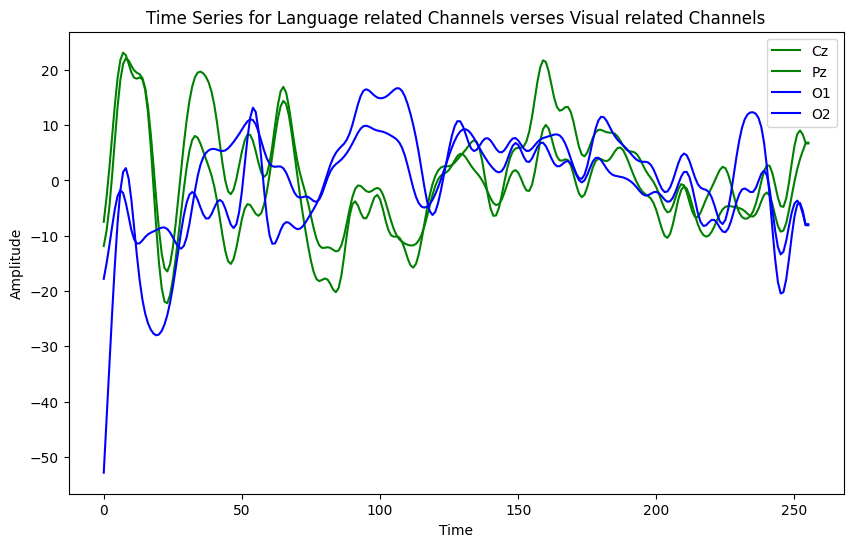

In [ ]:
from datetime import time
import matplotlib.pyplot as plt

time_series_1 = df_lang.loc['Cz']
time_series_2 = df_lang.loc['Pz']
time_series_3 = df_lang.loc['O1']
time_series_4 = df_lang.loc['O2']

plt.figure(figsize=(10, 6))
plt.plot(time_series_1, label='Cz', color = 'green')
plt.plot(time_series_2, label='Pz', color = 'green')
plt.plot(time_series_3, label='O1', color = 'blue')
plt.plot(time_series_4, label='O2', color = 'blue')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Series for Language related Channels verses Visual related Channels')
plt.legend()

plt.show()

Clearly shows difference.  
Cz and Pz show similar pattern.  
Pick Cz to process the task.  

# Extract Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd

path="/content/drive/MyDrive/FA24 CLASS/Sandia Challenge/"
zip_path = path + "Individual_ERPs.zip"
external_csv_path = path + "lawyer_spanish-english_translation_14.csv"

data_frames = []

with zipfile.ZipFile(zip_path, 'r') as zip_file:
    print("Files in the zip archive:")

    for file_name in zip_file.namelist():
        if file_name.endswith('.csv'):
            file_name2 = file_name.split("/")[-1]

            if file_name2 == "lawyer_spanish-english_translation_14.csv":
                continue

            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                # Use only Cz channel from the dataset
                if 'Cz' in df.columns:
                    cz_data = df['Cz'].to_frame().T
                    cz_data.index = [file_name2]
                    data_frames.append(cz_data)

df_external = pd.read_csv(external_csv_path)

if 'Cz' in df_external.columns:
    cz_data_external = df_external['Cz'].to_frame().T
    cz_data_external.index = ["lawyer_spanish-english_translation_14.csv"]
    data_frames.append(cz_data_external)


Files in the zip archive:


ValueError: Must pass 2-d input. shape=(20655, 1, 256)

In [ ]:
final_df = pd.concat(data_frames)
final_df

output_csv_path = path + "cz_data.csv"
#final_df.to_csv(output_csv_path)

# Preprocess Cz channel data

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/FA24 CLASS/Sandia Challenge/"

info = pd.read_csv(path + "metadata.csv")
final_df = pd.read_csv(path + "cz_data.csv", index_col=0)
#final_df.head()

In [ ]:
# Extract participant number
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

metadata = final_df.index.to_series().str.extract(r'(?P<Word>[^_]+)_(?P<Prime>[^-]+)-(?P<Target>[^_]+)_(?P<Relationship>[^_]+)_(?P<Participant>\d+)')

metadata.reset_index(drop=True, inplace=True)
final_df.reset_index(drop=True, inplace=True)

final_df = pd.concat([metadata, final_df], axis=1)

In [ ]:
final_df.head()

,Word,Prime,Target,Relationship,Participant,0,1,2,3,4,...,246,247,248,249,250,251,252,253,254,255
0,garlic,french,french,unrelated,18,6.881586,5.115586,2.886586,0.400586,-1.933414,...,24.300586,24.983586,25.721586,26.270586,26.218586,25.182586,22.997586,19.799586,16.003586,16.003586
1,neck,spanish,english,translation,26,10.948781,11.949781,12.760781,13.441781,14.122781,...,3.166781,6.033781,7.861781,8.295781,7.320781,5.157781,2.125781,-1.461219,-5.301219,-5.301219
2,pillow,french,english,unrelated,6,25.106805,22.731805,19.632805,15.650805,10.869805,...,-3.907195,-5.273195,-6.525195,-7.524195,-7.894195,-7.174195,-5.086195,-1.733195,2.388805,2.388805
3,mouth,english,french,translation,6,11.769391,15.074391,16.429391,15.983391,14.465391,...,-32.006609,-23.690609,-11.658609,1.457391,13.155391,21.719391,26.554391,28.229391,28.244391,28.244391
4,book,german,english,translation,2,2.509047,9.004047,13.531047,15.569047,15.122047,...,10.265047,9.095047,8.493047,8.503047,8.943047,9.573047,10.236047,10.890047,11.530047,11.530047


In [ ]:
final_df['Participant'].unique()

array(['26', '6', '2', '12', '24', '30', '36', '25', '22', '29', '4',
       '37', '16', '23', '15', '19', '32', '39', '20', '18', '11', '1',
       '40', '31', '21', '3', '35', '34', '17', '28', '14', '5', '33',
       '27', '8', '7', '9', '13', '38', '10'], dtype=object)

# Method 1: Time Series clustering
- First make ns spline with EEG to get only the important spikes.
- Apply Kmeans clustering to the ns splines to group participants with the same bilingual abilities.

## NS spline TS cluster

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import splev, interp1d
from sklearn.linear_model import LinearRegression

In [ ]:
# converted from R's ns()
# ns function
def ns(x, df=None, knots=None, boundary_knots=None, include_intercept=False):
    degree = 3

    if boundary_knots is None:
        boundary_knots = [np.min(x), np.max(x)]
    else:
        boundary_knots = np.sort(boundary_knots).tolist()

    oleft = x < boundary_knots[0]
    oright = x > boundary_knots[1]
    outside = oleft | oright
    inside = ~outside

    if df is not None:
        nIknots = df - 1 - include_intercept
        if nIknots < 0:
            nIknots = 0

        if nIknots > 0:
            knots = np.linspace(0, 1, num=nIknots + 2)[1:-1]
            knots = np.quantile(x[~outside], knots)

    Aknots = np.sort(np.concatenate((boundary_knots * 4, knots)))
    n_bases = len(Aknots) - (degree + 1)

    if any(outside):
        basis = np.empty((x.shape[0], n_bases), dtype=float)
        e = 1 / 4

        if any(oleft):
            k_pivot = boundary_knots[0]
            xl = x[oleft] - k_pivot
            xl = np.c_[np.ones(xl.shape[0]), xl]

            tt = np.empty((xl.shape[1], n_bases), dtype=float)
            for j in range(xl.shape[1]):
                for i in range(n_bases):
                    coefs = np.zeros((n_bases,))
                    coefs[i] = 1
                    tt[j, i] = splev(k_pivot, (Aknots, coefs, degree), der=j)

            basis[oleft, :] = xl @ tt

        if any(oright):
            k_pivot = boundary_knots[1]
            xr = x[oright] - k_pivot
            xr = np.c_[np.ones(xr.shape[0]), xr]

            tt = np.empty((xr.shape[1], n_bases), dtype=float)
            for j in range(xr.shape[1]):
                for i in range(n_bases):
                    coefs = np.zeros((n_bases,))
                    coefs[i] = 1
                    tt[j, i] = splev(k_pivot, (Aknots, coefs, degree), der=j)

            basis[oright, :] = xr @ tt

        if any(inside):
            xi = x[inside]
            tt = np.empty((len(xi), n_bases), dtype=float)
            for i in range(n_bases):
                coefs = np.zeros((n_bases,))
                coefs[i] = 1
                tt[:, i] = splev(xi, (Aknots, coefs, degree))

            basis[inside, :] = tt
    else:
        basis = np.empty((x.shape[0], n_bases), dtype=float)
        for i in range(n_bases):
            coefs = np.zeros((n_bases,))
            coefs[i] = 1
            basis[:, i] = splev(x, (Aknots, coefs, degree))

    const = np.empty((2, n_bases), dtype=float)
    for i in range(n_bases):
        coefs = np.zeros((n_bases,))
        coefs[i] = 1
        const[:, i] = splev(boundary_knots, (Aknots, coefs, degree), der=2)

    if include_intercept is False:
        basis = basis[:, 1:]
        const = const[:, 1:]

    qr_const = np.linalg.qr(const.T, mode='complete')[0]
    basis = (qr_const.T @ basis.T).T[:, 2:]

    return basis

In [ ]:
final_df.shape # 255 timestamp + participant language info

(20655, 261)

In [ ]:
# Create F(design matrix)
# def ns(x, df=None, knots=None, boundary_knots=None, include_intercept=False):

time_points = np.arange(1, 257)
F = ns(time_points, df=9, include_intercept=False) # knots, boundary_knots are calculated in the ns() when df is given

F_centered = F - np.mean(F, axis=0)
F_centered.shape
#F_centered.mean(axis=0)

(256, 9)

In [ ]:
# Get B transpose Bt=(Ft*F)^−1 * Ft*Xt.

time_series_data = final_df.iloc[:, 5:]
B_transpose = np.linalg.inv(F_centered.T @ F_centered) @ F_centered.T @ time_series_data.T
B = B_transpose.T
B.head()

,0,1,2,3,4,5,6,7,8
0,-3.528047,26.572035,-20.298981,14.311810,-15.809178,13.785057,-3.656785,41.618039,17.760978
1,-12.148585,-3.980384,-23.563562,-12.935133,-20.094901,-42.794664,-13.854819,-30.018057,-9.634104
2,-6.509845,-7.233366,-28.727622,-9.415505,-20.845375,-26.883110,-7.768227,-15.816699,-15.655430
3,4.825983,5.322465,4.885147,-20.273185,-1.977438,-16.799811,-16.976071,2.171728,10.058890
4,0.369017,-30.548040,-25.404692,-25.584411,4.090911,15.184625,-2.998335,-13.854643,12.993295


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=7216)
clusters = kmeans.fit_predict(B)
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ -7.8374046 ,  -2.31858762,  -8.82606173,  -6.04412834,
         -6.30991811,  -6.42254194,  -5.92145541, -12.40099662,
         -5.19352957],
       [  3.77666301,  17.41790935,  11.32912703,  16.31510918,
         18.1377888 ,  18.4717006 ,  15.90363123,  28.19398742,
         12.8433101 ]])

In [ ]:
cluster_time_series = F_centered @ cluster_centers.T
cluster_time_series.shape

(256, 2)

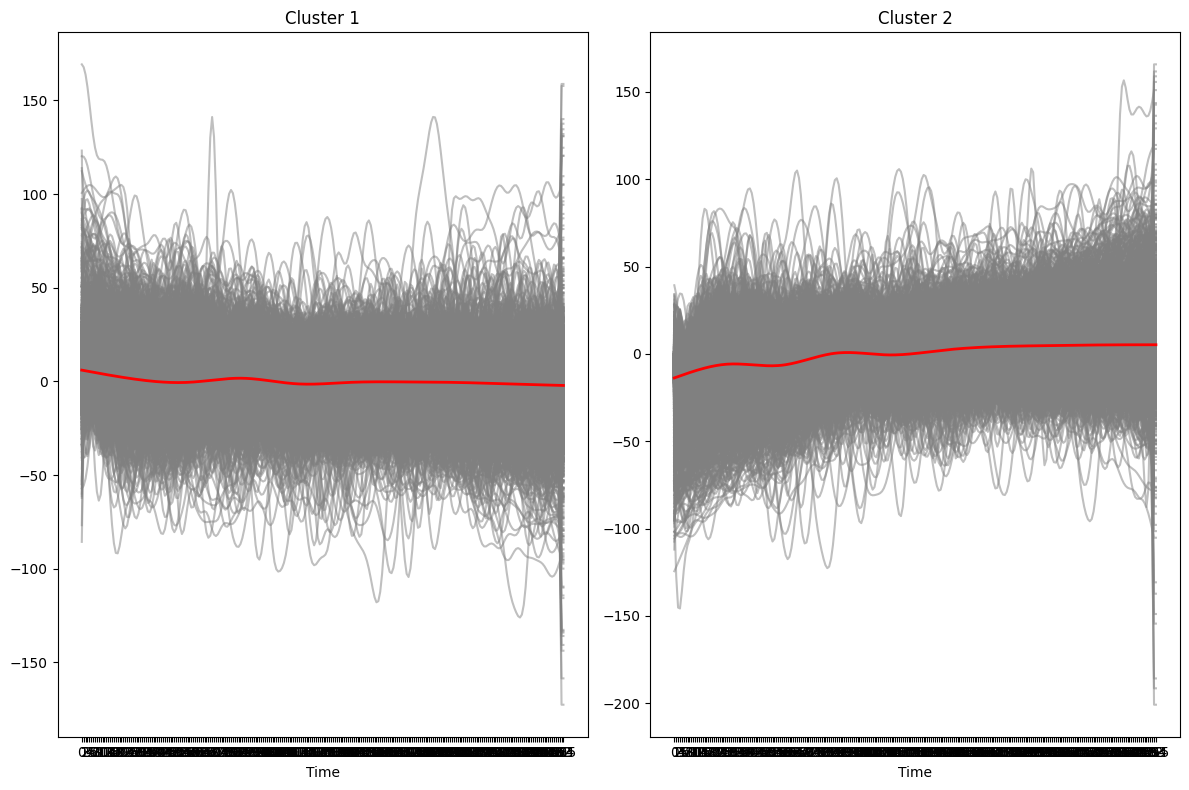

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(2):
    cluster_indices = np.where(clusters == i)[0]

    for idx in cluster_indices:
        axes[i].plot(time_series_data.iloc[idx], color='grey', alpha=0.5)

    axes[i].plot(cluster_time_series[:, i], color='red', linewidth=2)

    axes[i].set_title(f"Cluster {i + 1}")
    axes[i].set_xlabel("Time")


plt.tight_layout()
plt.show()

In [ ]:
final_df

,Word,Prime,Target,Relationship,Participant,0,1,2,3,4,...,246,247,248,249,250,251,252,253,254,255
0,garlic,french,french,unrelated,18,6.881586,5.115586,2.886586,0.400586,-1.933414,...,24.300586,24.983586,25.721586,26.270586,26.218586,25.182586,22.997586,19.799586,16.003586,16.003586
1,neck,spanish,english,translation,26,10.948781,11.949781,12.760781,13.441781,14.122781,...,3.166781,6.033781,7.861781,8.295781,7.320781,5.157781,2.125781,-1.461219,-5.301219,-5.301219
2,pillow,french,english,unrelated,6,25.106805,22.731805,19.632805,15.650805,10.869805,...,-3.907195,-5.273195,-6.525195,-7.524195,-7.894195,-7.174195,-5.086195,-1.733195,2.388805,2.388805
3,mouth,english,french,translation,6,11.769391,15.074391,16.429391,15.983391,14.465391,...,-32.006609,-23.690609,-11.658609,1.457391,13.155391,21.719391,26.554391,28.229391,28.244391,28.244391
4,book,german,english,translation,2,2.509047,9.004047,13.531047,15.569047,15.122047,...,10.265047,9.095047,8.493047,8.503047,8.943047,9.573047,10.236047,10.890047,11.530047,11.530047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20650,knife,spanish,spanish,translation,34,-5.807477,-11.715477,-13.680477,-11.777477,-7.379477,...,-6.058477,-4.098477,-3.049477,-3.305477,-4.605477,-6.167477,-7.084477,-6.850477,-5.696477,-5.696477
20651,daughter,english,french,unrelated,26,-15.509109,-18.593109,-21.345109,-23.490109,-24.807109,...,13.411891,13.025891,11.632891,9.570891,7.471891,6.016891,5.648891,6.376891,7.777891,7.777891
20652,wood,french,english,unrelated,1,-7.037652,-2.327652,0.689348,2.040348,2.164348,...,20.027348,20.465348,21.043348,21.473348,21.622348,21.556348,21.437348,21.386348,21.421348,21.421348
20653,ground,spanish,english,translation,2,-7.491027,-3.102027,2.051973,7.793973,13.533973,...,-4.787027,-3.276027,-0.408027,3.082973,6.274973,8.383973,9.022973,8.311973,6.824973,6.824973


## Result

In [ ]:
cluster_df = final_df.copy()
cluster_df['Cluster'] = clusters
cluster_df = cluster_df.iloc[:, [0, 1, 2, 3, 4, -1]]
cluster_df.head()

,Word,Prime,Target,Relationship,Participant,Cluster
0,garlic,french,french,unrelated,18,1
1,neck,spanish,english,translation,26,0
2,pillow,french,english,unrelated,6,0
3,mouth,english,french,translation,6,0
4,book,german,english,translation,2,0


In [ ]:
cluster_df = cluster_df.dropna(subset=['Participant'])
cluster_df['Participant'] = cluster_df['Participant'].astype(int)

<ipython-input-18-9a9ad5e64f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Participant'] = cluster_df['Participant'].astype(int)


In [ ]:
# each row are clustered in 2 groups
cluster_df

,Word,Prime,Target,Relationship,Participant,Cluster
0,garlic,french,french,unrelated,18,1
1,neck,spanish,english,translation,26,0
2,pillow,french,english,unrelated,6,0
3,mouth,english,french,translation,6,0
4,book,german,english,translation,2,0
...,...,...,...,...,...,...
20650,knife,spanish,spanish,translation,34,1
20651,daughter,english,french,unrelated,26,1
20652,wood,french,english,unrelated,1,1
20653,ground,spanish,english,translation,2,0


In [ ]:
# Focus on Spanish
spanish_df = cluster_df[(cluster_df['Prime'] == 'spanish') | (cluster_df['Target'] == 'spanish')]
spanish_df = spanish_df[spanish_df['Relationship'] == 'translation']
spanish_df

,Word,Prime,Target,Relationship,Participant,Cluster
1,neck,spanish,english,translation,26,0
16,chair,spanish,english,translation,30,1
17,neighbor,spanish,spanish,translation,36,1
22,city,english,spanish,translation,4,1
23,lawyer,spanish,english,translation,37,0
...,...,...,...,...,...,...
20642,place,spanish,spanish,translation,3,0
20644,watch,spanish,spanish,translation,18,0
20650,knife,spanish,spanish,translation,34,1
20653,ground,spanish,english,translation,2,0


In [ ]:
spanish_participants = [str(p) for p in info.loc[info['spanish'] == 1, 'participant'].tolist()]
german_participants = [str(p) for p in info.loc[info['german'] == 1, 'participant'].tolist()]
french_participants = [str(p) for p in info.loc[info['french'] == 1, 'participant'].tolist()]

# Mark bilingual participants Y/N
def check_bilingual(row):
    participant = str(row['Participant'])
    if row['Target'] == 'spanish' or row['Prime'] == 'spanish':
        return 'Y' if participant in spanish_participants else 'N'
    elif row['Target'] == 'german' or row['Prime'] == 'german':
        return 'Y' if participant in german_participants else 'N'
    elif row['Target'] == 'french' or row['Prime'] == 'french':
        return 'Y' if participant in french_participants else 'N'
    else:
        return 'N'

y = spanish_df.apply(check_bilingual, axis=1)

unique, counts = np.unique(y, return_counts=True)
pred_distribution = dict(zip(unique, counts))

print("Prediction distribution:", pred_distribution)

Prediction distribution: {'N': 2483, 'Y': 794}


In [ ]:
spanish_df = pd.concat([spanish_df, y.rename('Bilingual')], axis=1)
spanish_df.head()

,Word,Prime,Target,Relationship,Participant,Cluster,Bilingual
1,neck,spanish,english,translation,26,0,N
16,chair,spanish,english,translation,30,1,N
17,neighbor,spanish,spanish,translation,36,1,N
22,city,english,spanish,translation,4,1,N
23,lawyer,spanish,english,translation,37,0,N


In [ ]:
cluster_distribution = spanish_df.groupby('Cluster')['Bilingual'].value_counts(normalize=True)

print("Cluster distribution by Bilingual status:")
print(cluster_distribution)

bilingual_y_cluster = cluster_distribution.loc[:, 'Y'].idxmax()
print(f"The cluster most associated with Bilingual = 'Y' is: Cluster {bilingual_y_cluster}")

Cluster distribution by Bilingual status:
Cluster  Bilingual
0        N            0.772532
         Y            0.227468
1        N            0.738146
         Y            0.261854
Name: proportion, dtype: float64
The cluster most associated with Bilingual = 'Y' is: Cluster 1


Kmeans clustering of EEG ns splines do not show the true distribution of the bilianual abilities of the participants.

---  
---

# Mthd 2: Prediction model

In [ ]:
import numpy as np

spanish_participants = [str(p) for p in info.loc[info['spanish'] == 1, 'participant'].tolist()]
german_participants = [str(p) for p in info.loc[info['german'] == 1, 'participant'].tolist()]
french_participants = [str(p) for p in info.loc[info['french'] == 1, 'participant'].tolist()]

def check_bilingual(row):
    participant = str(row['Participant'])
    if row['Target'] == 'spanish' or row['Prime'] == 'spanish':
        return 'Y' if participant in spanish_participants else 'N'
    elif row['Target'] == 'german' or row['Prime'] == 'german':
        return 'Y' if participant in german_participants else 'N'
    elif row['Target'] == 'french' or row['Prime'] == 'french':
        return 'Y' if participant in french_participants else 'N'
    else:
        return 'N'

y = final_df.apply(check_bilingual, axis=1)

unique, counts = np.unique(y, return_counts=True)
pred_distribution = dict(zip(unique, counts))

print("Bilingual distribution:", pred_distribution)

Bilingual distribution: {'N': 17745, 'Y': 2910}


In [ ]:
spanish_df = final_df[(final_df['Prime'] == 'spanish') | (final_df['Target'] == 'spanish')]
spanish_df = spanish_df[spanish_df['Relationship'] == 'translation']
spanish_df.head()

,Word,Prime,Target,Relationship,Participant,0,1,2,3,4,...,246,247,248,249,250,251,252,253,254,255
1,neck,spanish,english,translation,26,10.948781,11.949781,12.760781,13.441781,14.122781,...,3.166781,6.033781,7.861781,8.295781,7.320781,5.157781,2.125781,-1.461219,-5.301219,-5.301219
16,chair,spanish,english,translation,30,1.806137,-1.544863,-3.813863,-5.139863,-6.124863,...,-7.915863,-8.830863,-9.105863,-8.831863,-8.214863,-7.414863,-6.466863,-5.345863,-4.092863,-4.092863
17,neighbor,spanish,spanish,translation,36,-6.105105,-5.350105,-4.471105,-3.177105,-1.428105,...,13.504895,18.143895,25.016895,32.111895,35.276895,28.744895,7.447895,-29.489105,-76.644105,-76.644105
22,city,english,spanish,translation,4,-14.064312,-20.806313,-25.663312,-28.102313,-28.058312,...,0.576688,-1.767313,-4.140313,-5.845313,-6.616313,-6.651313,-6.400313,-6.247312,-6.310313,-6.310313
23,lawyer,spanish,english,translation,37,12.118641,11.404641,9.846641,7.626641,5.313641,...,-13.093359,-13.245359,-11.933359,-9.454359,-6.469359,-3.775359,-1.973359,-1.207359,-1.107359,-1.107359


In [ ]:
# Bilingual 값 계산 및 열 추가
#spanish_df['Bilingual'] = y
spanish_df['Bilingual'] = spanish_df.apply(check_bilingual, axis=1)

# Bilingual이 'Y'인 값만 선택
unique_bi_y = spanish_df[spanish_df['Bilingual'] == 'Y']['Bilingual'].unique()

Unique values for Bilingual == 'Y': ['Y']


In [ ]:
spanish_df[spanish_df['Bilingual'] == 'Y']['Participant'].unique()

array(['15', '39', '35', '13', '16', '31', '19', '10', '14', '17'],
      dtype=object)

In [ ]:
spanish_participants

['10', '13', '14', '15', '16', '17', '19', '31', '35', '39']

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

X = spanish_df.iloc[:, 5:].values

# Change bilingual info to 1/0
y = spanish_df.apply(check_bilingual, axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 3dimention (samples, timesteps, features)
X = np.expand_dims(X, axis=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 유지
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, class_weight=class_weights)

# Performance
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Non-Bilingual', 'Bilingual']))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.5913 - loss: 0.7583 - val_accuracy: 0.6198 - val_loss: 0.6837
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 358ms/step - accuracy: 0.6268 - loss: 0.6741 - val_accuracy: 0.3536 - val_loss: 0.7157
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 203ms/step - accuracy: 0.5011 - loss: 0.6842 - val_accuracy: 0.6312 - val_loss: 0.6641
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.5989 - loss: 0.6645 - val_accuracy: 0.7452 - val_loss: 0.6230
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.6146 - loss: 0.6687 - val_accuracy: 0.6692 - val_loss: 0.6164
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.6545 - loss: 0.6173 - val_accuracy: 0.5932 - val_loss: 0.6395
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.6858 - loss: 0.6115 - val_accuracy: 0.6350 - val_loss: 0.6164
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.6865 - loss: 0.5875 - val_accuracy: 0.718

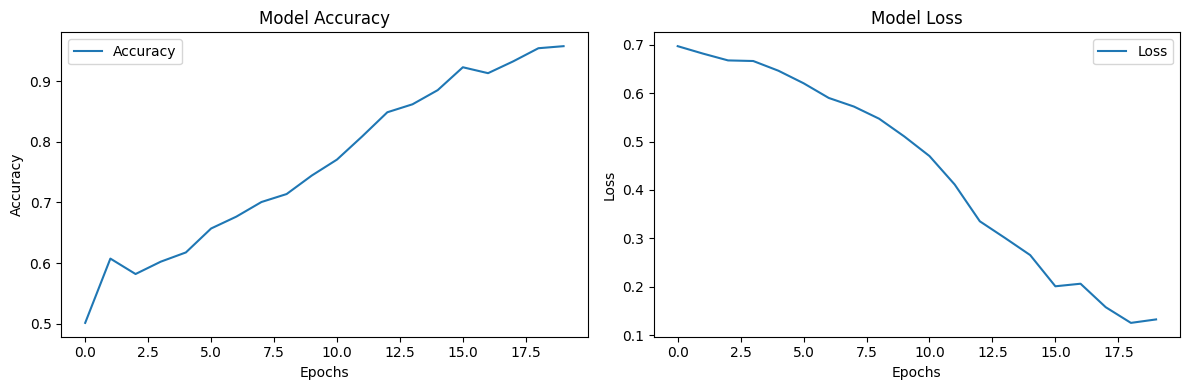

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
pred_distribution = dict(zip(unique, counts))

print("Prediction distribution:", pred_distribution)

Prediction distribution: {0: 474, 1: 182}


Make prediction for one random sample

In [ ]:
import random

# Pick random sample to make prediction
random_index = random.randint(0, X_test.shape[0] - 1)
random_sample = X_test[random_index:random_index + 1]

prediction = (model.predict(random_sample) > 0.5).astype("int32")

predicted_label = 'Bilingual' if prediction[0][0] == 1 else 'Non-Bilingual'
actual_label = 'Bilingual' if y_test[random_index] == 1 else 'Non-Bilingual'

print(f"Random Sample Index: {random_index}")
print(f"Model Prediction: {predicted_label}")
print(f"Actual Label: {actual_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Random Sample Index: 9
Model Prediction: Bilingual
Actual Label: Bilingual


In [ ]:
new_df = spanish_df.copy()
new_X = spanish_df.iloc[:, 5:].values

new_X = np.expand_dims(new_X, axis=2)

new_y_pred = (model.predict(new_X) > 0.5).astype("int32")

new_df['Prediction'] = new_y_pred
new_df['Actual'] = spanish_df.apply(check_bilingual, axis=1)

103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step


Spanish bilingual detection result

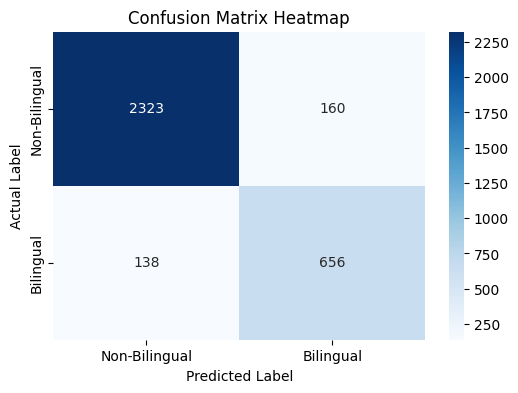

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()
new_df['Actual'] = label_encoder.fit_transform(new_df['Actual'])  # Y/N -> 1/0

conf_matrix = confusion_matrix(new_df['Actual'], new_df['Prediction'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bilingual', 'Bilingual'], yticklabels=['Non-Bilingual', 'Bilingual'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## German df

In [ ]:
german_df = final_df[(final_df['Prime'] == 'german') | (final_df['Target'] == 'german')]
german_df = german_df[german_df['Relationship'] == 'translation']
german_df.head()

,Word,Prime,Target,Relationship,Participant,0,1,2,3,4,...,246,247,248,249,250,251,252,253,254,255
4,book,german,english,translation,2,2.509047,9.004047,13.531047,15.569047,15.122047,...,10.265047,9.095047,8.493047,8.503047,8.943047,9.573047,10.236047,10.890047,11.530047,11.530047
20,neck,english,german,translation,22,5.957223,8.778223,10.092223,9.462223,6.844223,...,0.579223,-0.301777,-0.992777,-1.544777,-1.830777,-1.561777,-0.456777,1.534223,4.114223,4.114223
25,neck,english,german,translation,36,-7.928598,-9.546598,-10.544598,-10.752598,-10.199598,...,1.855402,2.015402,1.005402,-0.619598,-2.318598,-3.737598,-4.774598,-5.527598,-6.177598,-6.177598
59,place,german,english,translation,40,5.627406,5.992406,6.726406,7.692406,8.454406,...,-6.523594,-7.004594,-6.479594,-4.621594,-2.096594,-0.354594,-0.876594,-4.237594,-9.609594,-9.609594
63,leaf,english,german,translation,2,-15.824426,-19.275426,-21.746426,-22.850426,-22.425426,...,3.140574,2.557574,1.896574,1.189574,0.439574,-0.413426,-1.463426,-2.756426,-4.219426,-4.219426


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

X = german_df.iloc[:, 5:].values
#y = spanish_df.apply(check_bilingual, axis=1)

y = german_df.apply(check_bilingual, axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = np.expand_dims(X, axis=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

model_german = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 유지
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_german.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

history = model_german.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, class_weight=class_weights)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 291ms/step - accuracy: 0.5132 - loss: 0.7502 - val_accuracy: 0.8973 - val_loss: 0.6724
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 210ms/step - accuracy: 0.6674 - loss: 0.6784 - val_accuracy: 0.3384 - val_loss: 0.7519
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.4446 - loss: 0.6734 - val_accuracy: 0.6806 - val_loss: 0.6411
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5996 - loss: 0.6617 - val_accuracy: 0.4753 - val_loss: 0.7029
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.5523 - loss: 0.6643 - val_accuracy: 0.6350 - val_loss: 0.6112
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.6306 - loss: 0.6292 - val_accuracy: 0.5019 - val_loss: 0.6986
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.5645 - loss: 0.6477 - val_accuracy: 0.7148 - val_loss: 0.5644
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.6691 - loss: 0.6000 - val_accu

In [ ]:
new_df = german_df.copy()
new_X = german_df.iloc[:, 5:].values

new_X = np.expand_dims(new_X, axis=2)

new_y_pred = (model_german.predict(new_X) > 0.65).astype("int32")

new_df['Prediction'] = new_y_pred
new_df['Actual'] = german_df.apply(check_bilingual, axis=1)

103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step


German bilingual detection result

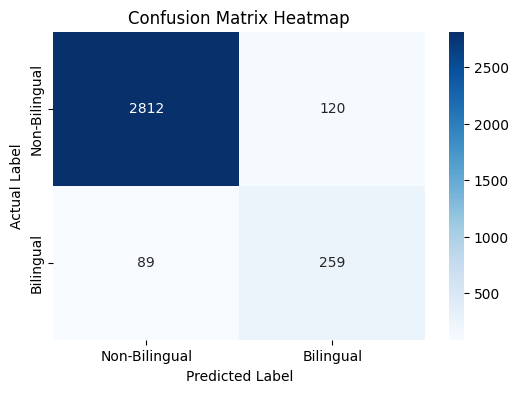

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()
new_df['Actual'] = label_encoder.fit_transform(new_df['Actual'])  # Y/N -> 1/0

conf_matrix = confusion_matrix(new_df['Actual'], new_df['Prediction'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bilingual', 'Bilingual'], yticklabels=['Non-Bilingual', 'Bilingual'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


## French df

In [ ]:
french_df = final_df[(final_df['Prime'] == 'french') | (final_df['Target'] == 'french')]
french_df = french_df[french_df['Relationship'] == 'translation']
french_df.head()

,Word,Prime,Target,Relationship,Participant,0,1,2,3,4,...,246,247,248,249,250,251,252,253,254,255
3,mouth,english,french,translation,6,11.769391,15.074391,16.429391,15.983391,14.465391,...,-32.006609,-23.690609,-11.658609,1.457391,13.155391,21.719391,26.554391,28.229391,28.244391,28.244391
6,yesterday,french,french,translation,2,-11.967293,-6.789293,-3.810293,-3.304293,-4.896293,...,5.964707,6.753707,6.561707,5.472707,3.987707,2.820707,2.547707,3.311707,4.760707,4.760707
10,cloud,french,french,translation,24,-53.026516,-53.993516,-55.114516,-56.144516,-56.708516,...,45.724484,47.182484,47.797484,47.671484,47.217484,46.943484,47.206484,48.076484,49.340484,49.340484
21,neck,english,french,translation,29,9.149977,12.128977,12.734977,10.669977,6.375977,...,4.789977,6.857977,8.395977,9.032977,8.650977,7.397977,5.578977,3.495977,1.343977,1.343977
33,face,french,english,translation,19,-4.915047,-3.213047,-0.948047,1.537953,3.561953,...,-1.471047,1.615953,4.943953,7.639953,9.005953,8.687953,6.747953,3.599953,-0.136047,-0.136047


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

X = french_df.iloc[:, 5:].values

y = french_df.apply(check_bilingual, axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = np.expand_dims(X, axis=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

model_french = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 유지
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_french.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

history = model_french.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, class_weight=class_weights)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.5131 - loss: 0.7299 - val_accuracy: 0.1456 - val_loss: 0.7328
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.3823 - loss: 0.6739 - val_accuracy: 0.1571 - val_loss: 0.7281
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.5567 - loss: 0.6724 - val_accuracy: 0.1494 - val_loss: 0.8016
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.4921 - loss: 0.6935 - val_accuracy: 0.4406 - val_loss: 0.7132
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.5392 - loss: 0.6751 - val_accuracy: 0.4789 - val_loss: 0.7271
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.5914 - loss: 0.6688 - val_accuracy: 0.5326 - val_loss: 0.7013
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.6806 - loss: 0.6338 - val_accuracy: 0.6398 - val_loss: 0.6622
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - accuracy: 0.7083 - loss: 0.6036 - val_accu

In [ ]:
new_df = french_df.copy()
new_X = french_df.iloc[:, 5:].values

new_X = np.expand_dims(new_X, axis=2)

new_y_pred = (model_french.predict(new_X) > 0.5).astype("int32")

new_df['Prediction'] = new_y_pred
new_df['Actual'] = french_df.apply(check_bilingual, axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step


French bilingual detection result

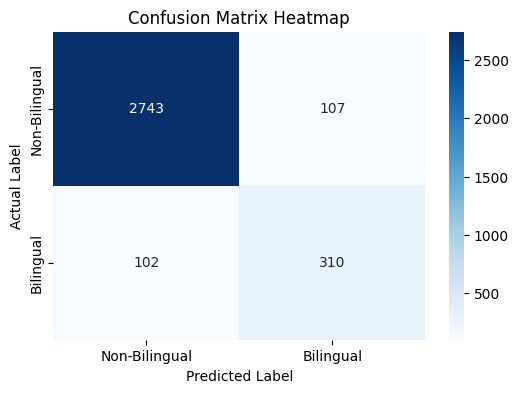

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()
new_df['Actual'] = label_encoder.fit_transform(new_df['Actual'])  # Y/N -> 1/0

conf_matrix = confusion_matrix(new_df['Actual'], new_df['Prediction'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bilingual', 'Bilingual'], yticklabels=['Non-Bilingual', 'Bilingual'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
